In [35]:
import numpy as np

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define derivative of sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [36]:
# Initialize inputs and outputs
x1 = 0.92
x2 = 0.42

y1 = 0
y2 = 1


# Initialize weights and biases
def initialize():
    hidden_w = np.random.rand(2,2)
    output_w = np.random.rand(2,2)
    hidden_biases = np.random.rand(2,1)
    output_biases = np.random.rand(2,1)
    print('Hidden Layer Weights:', hidden_w)
    print('Output Layer Weights:', output_w)
    print('Hidden Layer Biases:', hidden_biases)
    print('Output Layer Biases:', output_biases)
    return hidden_w, output_w, hidden_biases, output_biases

# Forward Propagation
def forward(x1, x2, hidden_w, output_w, biases_hidden, biases_output):
    z_layer_2 = np.dot(hidden_w, np.array([[x1],[x2]])) + biases_hidden
    hidden_activations = sigmoid(z_layer_2)
    z_layer_3 = np.dot(output_w, hidden_activations) + biases_output
    output_activations = sigmoid(z_layer_3)

    return z_layer_2, hidden_activations, z_layer_3, output_activations


# Define Mean Squared Error loss function
def mse_loss(y1,y2,output_activations):
    e1 = (1/2)*((y1 - output_activations[0])**2)
    e2 = (1/2)*((y2 - output_activations[1])**2)
    mse = e1 + e2
    print('Loss:', mse)
    return mse


In [41]:
# Backpropagation

def back_prop(x1,x2,y1,y2,weights_output,output_activations, z_layer_2, z_layer_3, hidden_activations):

    # output weights
    dE_dy_output = output_activations - np.array([[y1],[y2]])
    dy_dz_output = sigmoid_derivative(z_layer_3)
    dz_dw_output = hidden_activations.T

    dE_dw_output = np.dot(dE_dy_output*dy_dz_output, dz_dw_output)

    # Hidden Weights
    dz_dy_hidden = weights_output
    dy_dz_hidden = sigmoid_derivative(z_layer_2)
    dz_dx_hidden = np.array([[x1],[x2]])
    dE_dy_hidden = np.dot(dz_dy_hidden, dE_dy_output * dy_dz_output)
    dE_dz_hidden = dE_dy_hidden * dy_dz_hidden
    dE_dw_hidden = np.dot(dz_dx_hidden, dE_dz_hidden.T)

    return dE_dw_output, dE_dw_hidden


In [42]:
# Update weights
def update(lr, hidden_w, dE_dw_hidden, output_w, dE_dw_output):
    hidden_w = hidden_w - (lr*dE_dw_hidden)
    output_w = output_w - (lr*dE_dw_output)

    print('Updated Hidden Layer Weights:', hidden_w)
    print('Updated Output Layer Weights:', output_w)

    return hidden_w, output_w


In [49]:
x1 = 0.92
x2 = 0.42

y1 = 0.3
y2 = 0.7

lr = 5

hidden_w, output_w, hidden_biases, output_biases = initialize()

# hidden_layer_biases = np.array([[0.4], [0.4]])
# output_layer_biases = np.array([[0.5], [0.5]])
# print('Hidden Layer Biases:', hidden_layer_biases)
# print('Output Layer Biases:', output_layer_biases)

# hidden_layer_weights = np.array([[0.3, 0.7], [0.2, 0.8]])
# output_layer_weights = np.array([[0.2, 0.5], [0.8, 0.5]])
# print('Original Hidden layer weights:', hidden_layer_weights)
# print('Original Output layer weights:', output_layer_weights)

n = 1000
loss = []

for i in range(1,n+1):
    print('================================================')
    print(f'Iteration {i}:')
    z_layer_2, hidden_activations, z_layer_3, output_activations = forward(x1, x2, hidden_w, output_w,
                                                                        hidden_biases, output_biases)
    mse = mse_loss(y1,y2, output_activations)

    dE_dw_output, dE_dw_hidden = back_prop(x1, x2, y1, y2, output_w, 
                                                 output_activations, z_layer_2, z_layer_3, hidden_activations)
    
    hidden_w, output_w = update(lr, hidden_w, dE_dw_hidden, output_w, dE_dw_output)

    loss.append(mse)


mse = mse_loss(y1,y2,output_activations)


Hidden Layer Weights: [[0.56815589 0.78921846]
 [0.12995587 0.93931591]]
Output Layer Weights: [[0.67983113 0.77730998]
 [0.31241419 0.44201087]]
Hidden Layer Biases: [[0.02616787]
 [0.94895959]]
Output Layer Biases: [[0.198776  ]
 [0.87553342]]
Iteration 1:
Loss: [0.12501621]
Updated Hidden Layer Weights: [[0.50271072 0.76604731]
 [0.10007873 0.92873777]]
Updated Output Layer Weights: [[0.39152887 0.44614224]
 [0.25233528 0.37299928]]
Iteration 2:
Loss: [0.08298609]
Updated Hidden Layer Weights: [[0.46381355 0.74678357]
 [0.08232133 0.91994345]]
Updated Output Layer Weights: [[0.10148007 0.10795644]
 [0.19899868 0.31081084]]
Iteration 3:
Loss: [0.04455263]
Updated Hidden Layer Weights: [[0.45529695 0.73365026]
 [0.07843331 0.91394782]]
Updated Output Layer Weights: [[-0.13656812 -0.17233645]
 [ 0.15246125  0.25601476]]
Iteration 4:
Loss: [0.02057534]
Updated Hidden Layer Weights: [[0.46389058 0.72613014]
 [0.08235649 0.91051472]]
Updated Output Layer Weights: [[-0.29959813 -0.36488592

Loss: [1.54074396e-33]


Text(0, 0.5, 'Loss')

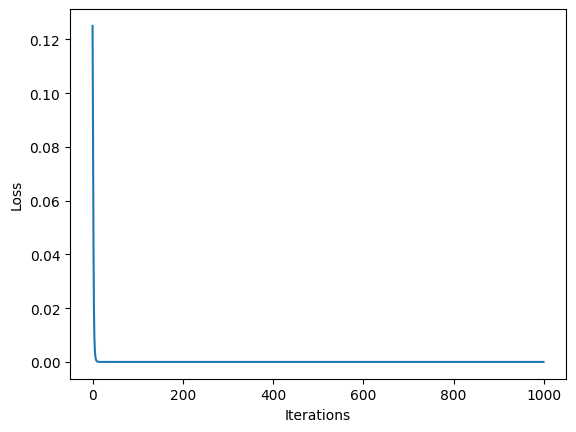

In [50]:
import matplotlib.pyplot as plt

print('Loss:', loss[-1])
plt.plot(range(len(loss)), loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
